In [1]:
import numpy as np
import pandas as pd
import pandas_market_calendars as mcal
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

Vamos a generar los precios de dos activos dados por:

* valores medios
* volatilidades
* correlación

In [2]:
# Parámetros de los activos
med1 = 0.03/252  # Media del primer activo
std1 = 0.05/np.sqrt(252)  # Desviación estándar del primer activo

med2 = 0.04/252  # Media del segundo activo
std2 = 0.06/np.sqrt(252)  # Desviación estándar del segundo activo

corr12 = 0.2  # Coeficiente de correlación entre los dos activos

Definimos los días de la simulación y, usando el calendario de días hábiles, calculamos los días naturalesde la simulación.

Con los días naturales y la fecha inicial, generamos las fechas de la simulación 

In [3]:
# Número de días y simulaciones
num_dias = 5000

In [4]:
# Crear un calendario para el mercado de Estados Unidos (por ejemplo, NASDAQ)
us_cal = mcal.get_calendar('XNYS')

# Definir la fecha de inicio
start_date = pd.Timestamp('2020-01-01')

# Definir el número de días laborables deseados
num_business_days = 5000

# Inicializar una variable para contar los días laborables
business_days_count = 0

# Inicializar la fecha de inicio
current_date = start_date

# Mientras no se alcance el número deseado de días laborables
while business_days_count < num_business_days:
    # Verificar si la fecha actual es un día laborable
    if us_cal.valid_days(start_date=current_date, end_date=current_date).size > 0:
        business_days_count += 1
    current_date += pd.DateOffset(days=1)  # Avanzar al siguiente día natural

dias_naturales = current_date - start_date

# La variable 'current_date' ahora contiene la fecha en la que se alcanzaron los 1000 días laborables
print(f"Se necesitan {dias_naturales} días naturales para obtener {num_business_days} días laborables.")

# Generar un rango de fechas de días hábiles
business_days = us_cal.valid_days(start_date=start_date, end_date=start_date + pd.DateOffset(days=dias_naturales.days))


Se necesitan 7269 days 00:00:00 días naturales para obtener 5000 días laborables.


In [5]:
# Generar retornos diarios
np.random.seed(0)  # Fijar la semilla para reproducibilidad

# Generamos la matriz de covarianza
cov_matrix = np.array([[std1**2, corr12 * std1 * std2],
                       [corr12 * std1 * std2, std2**2]])

# Generamos los retornos
returns = np.random.multivariate_normal([med1, med2], cov_matrix, num_dias)

In [6]:
# Creamos un DataFrame de Pandas con los retornos y las fechas como índice
returns_df = pd. DataFrame(returns, columns=['Activo 1', 'Activo 2'], index=business_days)

# Convierte el 'DatetimeIndex' en una columna 'fecha' con solo la fecha
returns_df['fecha'] = returns_df.index.date

# Luego, crea un nuevo 'DatetimeIndex' usando la columna 'fecha'
returns_df.index = pd.to_datetime(returns_df['fecha'])

# Ahora puedes eliminar la columna 'fecha' si lo deseas
returns_df.drop('fecha', axis=1, inplace=True)

returns_df.head(2)

,Activo 1,Activo 2
fecha,,
2020-01-02,0.003992,0.006002
2020-01-03,0.007772,0.000979


Comprobamos que los retornos tienen la correlación deseada

In [7]:
print(f' El coeficiente de correlación de los retornos es {returns_df.corr().iloc[0, 1]:.4f} y el esperado es {corr12}')

 El coeficiente de correlación de los retornos es 0.2027 y el esperado es 0.2


In [8]:
df_precios = 1 + returns_df.cumsum()
precios_ini = np.array([117, 238])
df_precios = precios_ini * df_precios

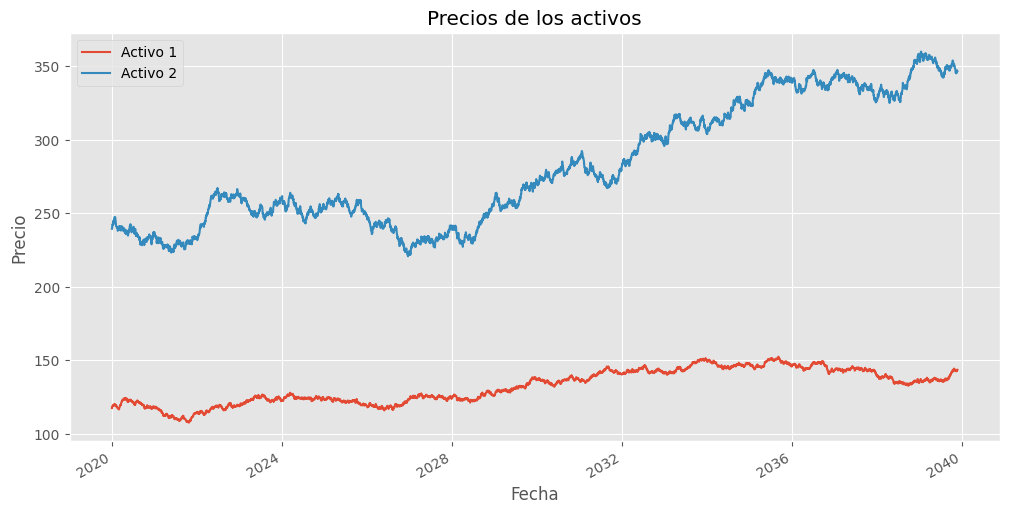

In [9]:
#hacemos una gráfica de los precios
df_precios.plot(figsize=(12, 6))
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Precios de los activos')
plt.show()


In [11]:
def genera_retornos(medias, desviaciones, correlaciones, num_dias):
    """
    Genera una matriz de retornos diarios para un conjunto de activos.
    :param medias: Vector de medias de los activos
    :param desviaciones: Vector de desviaciones estándar de los activos
    :param correlaciones: Matriz de correlaciones entre los activos
    :param num_dias: Número de días para los que se generarán los retornos
    :return: Matriz de retornos diarios
    """

        # Verificar que medias, desviaciones y correlaciones tengan la misma longitud
    if len(medias) != len(desviaciones) or len(medias) != len(correlaciones):
        raise ValueError("Las listas de medias, desviaciones y correlaciones deben tener la misma longitud.")

    # Resto del código para generar los retornos
    num_activos = len(medias)
 
    # Generamos la matriz de covarianza
    cov_matrix = np.zeros((num_activos, num_activos))
    
    for i in range(num_activos):
        for j in range(num_activos):
            cov_matrix[i, j] = desviaciones[i] * desviaciones[j] * correlaciones[i, j]

    # Generamos los retornos
    returns = np.random.multivariate_normal(medias, cov_matrix, num_dias)

    return returns

In [12]:
medias = np.array([0.03, 0.04, 0.02, 0.001, 0.005]) / 252

# Desviaciones estándar de cada activo (reemplaza con tus valores)
desviaciones = np.array([0.05, 0.06, 0.04, 0.07, 0.03]) / np.sqrt(252)

# Valores de correlación del primer activo con los demás activos (reemplaza con tus valores)
correlaciones = np.array([1.0, 0.7, 0.5, 0.3, 0.2])

kk = genera_retornos(medias, desviaciones, correlaciones, 5000)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [10]:
num_activos = 3  # Número de activos
medias = [0.03, 0.04, 0.02]  # Medias de los activos
desviaciones = [0.05, 0.06, 0.04]  # Desviaciones estándar de los activos

# Número de días y simulaciones
num_dias = 100

# Generar retornos diarios
np.random.seed(0)  # Fijar la semilla para reproducibilidad

# Crear una matriz de correlaciones lineales
correlaciones = np.linspace(-1, 1, num_activos)

cov_matrix = np.outer(desviaciones, desviaciones)

In [53]:
matriz_correlaciones  = np.tile(correlaciones, (3,1))
np.fill_diagonal(matriz_correlaciones, 1.0)

In [58]:
np.array([0.03, 0.04, 0.02, 0.001, 0.005]) / 252

array([1.19047619e-04, 1.58730159e-04, 7.93650794e-05, 3.96825397e-06,
       1.98412698e-05])

In [60]:
# Número de activos
n = 5

# Número de días
num_dias = 1000

medias = np.array([0.03, 0.04, 0.02, 0.001, 0.005]) / 252

# Desviaciones estándar de cada activo (reemplaza con tus valores)
desviaciones = np.array([0.05, 0.06, 0.04, 0.07, 0.03]) / np.sqrt(252)

# Valores de correlación del primer activo con los demás activos (reemplaza con tus valores)
correlaciones = np.array([1.0, 0.7, 0.5, 0.3, 0.2])

# Inicializa una matriz de covarianzas vacía de dimensiones n x n
cov_matrix = np.zeros((n, n))

# Llena la diagonal principal con las varianzas de cada activo
cov_matrix[np.arange(n), np.arange(n)] = desviaciones**2

# Llena el resto de la matriz con los productos de desviaciones y correlaciones
for i in range(1, n):
    for j in range(i):
        cov_matrix[i, j] = desviaciones[i] * desviaciones[0] * correlaciones[i]
        cov_matrix[j, i] = cov_matrix[i, j]

In [61]:
returns = np.random.multivariate_normal(medias, cov_matrix, num_dias)

In [64]:
returns_df = pd.DataFrame(returns, columns=['Activo 1', 'Activo 2', 'Activo 3', 'Activo 4', 'Activo 5'])

In [66]:
returns_df.corr()

,Activo 1,Activo 2,Activo 3,Activo 4,Activo 5
Activo 1,1.000000,0.672713,0.462852,0.344699,0.211108
Activo 2,0.672713,1.000000,0.380485,0.297386,0.182776
Activo 3,0.462852,0.380485,1.000000,0.404296,0.284698
Activo 4,0.344699,0.297386,0.404296,1.000000,0.191424
Activo 5,0.211108,0.182776,0.284698,0.191424,1.000000


In [43]:
# Parámetros de los activos
num_activos = 10  # Número de activos
medias = [0.03, 0.04, 0.02, 0.05, 0.01, 0.03, 0.02, 0.04, 0.02, 0.03]  # Medias de los activos
desviaciones = [0.05, 0.06, 0.04, 0.07, 0.03, 0.05, 0.04, 0.06, 0.04, 0.05]  # Desviaciones estándar de los activos

# Número de días y simulaciones
num_dias = 100
num_simulaciones = 1000

# Generar retornos diarios
np.random.seed(0)  # Fijar la semilla para reproducibilidad

# Crear una matriz de correlaciones lineales
correlaciones = np.linspace(-1, 1, num_activos)
np.fill_diagonal(correlaciones, 1.0)  # Establecer las correlaciones de cada activo consigo mismo en 1

# Crear una matriz de covarianza a partir de las correlaciones y desviaciones estándar
cov_matrix = np.outer(desviaciones, desviaciones) * correlaciones

returns = np.random.multivariate_normal(medias, cov_matrix, num_dias)

ValueError: array must be at least 2-d